<a href="https://colab.research.google.com/github/ruancastro/Aceleradev_Codenation2020/blob/master/Desafio_CodeNation_Aceleradev_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Desafio](https://www.codenation.dev/aceleradev/ds-online-2/challenge/enem-ps) para inscrição no Aceleradev da CodeNation.

##Importando as bibliotecas e carregando os datasets


In [6]:
!pip install orderedset
!pip install optuna


In [0]:
import pandas as pd
import numpy as np
import math
import time
import gc

import matplotlib.pyplot as plt
import seaborn as sns

from orderedset import OrderedSet
from zipfile import ZipFile

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

import lightgbm as lgb

import optuna

import warnings
warnings.filterwarnings('ignore')

In [0]:
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

try:
    sklearn.set_config(display='diagram')
except:
    pass

In [9]:
file_name = "/content/drive/My Drive/Engenharia Elétrica/GPDS/Data Science/desafio aceleradev/testfiles (1).zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
test.csv                                       2018-10-15 20:40:36      1390256
README.md                                      2019-03-21 10:58:54         1721
__MACOSX/                                      2019-03-21 10:59:32            0
__MACOSX/._README.md                           2019-03-21 10:58:54          571
train.csv                                      2018-10-15 20:40:36     11960652
Extracting all the files now...
Done!


In [0]:
df_train = pd.read_csv("/content/train.csv",index_col=0)
df_test = pd.read_csv("/content/test.csv")

#Primeira tentativa

In [11]:
# print(df_test.isna().sum())
df_test.fillna(df_test.median(),inplace=True)
# print("\n\n\n Será que funfou ? \n\n\n")
# print(df_test.isna().sum())

# print(df_train.isna().sum())
df_train.fillna(df_train.median(),inplace=True)
# print("\n\n\n Será que funfou ? \n\n\n")
# print(df_train.isna().sum())

df_num_train = df_train.select_dtypes(exclude='object')
# print(len(df_num_train.columns))  
# print(df_num_train.info)
df_num_test = df_test.select_dtypes(exclude='object')

# print(set(df_num_train.columns).intersection(set(df_num_test.columns)))
colunas_comuns=(set(df_num_train.columns).intersection(set(df_num_test.columns)))
colunas_comuns=list(colunas_comuns)
colunas_comuns.append('NU_NOTA_MT')
df_num_train_filt = df_num_train[colunas_comuns]
print(type(df_num_train_filt))
# df_num_train_filt["NU_NOTA_MT"] = (df_num_train.loc[:,'NU_NOTA_MT']).copy()
print(len(df_num_train_filt.columns))
print(len(df_num_test.columns))
print(df_num_train_filt['NU_NOTA_MT'])
print(df_num_train_filt.columns)
print(df_num_test.columns)

<class 'pandas.core.frame.DataFrame'>
33
32
1       399.4
2       459.8
3       461.2
4       461.2
5       461.2
        ...  
4582    403.2
4583    452.4
4584    398.0
4585    386.6
4586    428.9
Name: NU_NOTA_MT, Length: 13730, dtype: float64
Index(['TP_PRESENCA_CN', 'IN_DISCALCULIA', 'NU_NOTA_COMP5', 'NU_NOTA_CH',
       'TP_COR_RACA', 'TP_PRESENCA_CH', 'NU_NOTA_REDACAO', 'TP_LINGUA',
       'TP_ESCOLA', 'TP_PRESENCA_LC', 'IN_BAIXA_VISAO', 'IN_SURDEZ',
       'IN_GESTANTE', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC',
       'NU_NOTA_COMP3', 'IN_DISLEXIA', 'TP_NACIONALIDADE', 'IN_SABATISTA',
       'IN_IDOSO', 'NU_NOTA_CN', 'NU_NOTA_COMP2', 'TP_ST_CONCLUSAO',
       'NU_NOTA_COMP4', 'TP_STATUS_REDACAO', 'TP_ANO_CONCLUIU', 'NU_IDADE',
       'CO_UF_RESIDENCIA', 'IN_CEGUEIRA', 'TP_ENSINO', 'NU_NOTA_LC',
       'NU_NOTA_COMP1', 'NU_NOTA_MT'],
      dtype='object')
Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ES

In [0]:
x_train = df_num_train_filt.drop(['NU_NOTA_MT'],axis=1)
y_train = df_num_train_filt['NU_NOTA_MT']

In [0]:
regr = LinearRegression()
regr.fit(x_train,y_train)
notas = regr.predict(df_num_test)
# notas=notas.transpose()

In [14]:
final_df = pd.DataFrame(columns=['NU_INSCRICAO','NU_NOTA_MT'])
final_df['NU_INSCRICAO'] = df_test['NU_INSCRICAO'].copy()
final_df['NU_NOTA_MT'] = pd.Series(notas)
print(final_df.head(10))
# final_df.to_csv('/content/drive/My Drive/Engenharia Elétrica/GPDS/Data Science/01.csv')
# final_df.to_excel('/content/meucu.xls')


                               NU_INSCRICAO   NU_NOTA_MT
0  73ff9fcc02f0a99919906c942c2e1a1042cdcf98  -341.784400
1  71a95f9f1b91a82c65ad94abbdf9f54e6066f968  -354.144106
2  b38a03232f43b11c9d0788abaf060f7366053b6d  -910.590284
3  70b682d9a3636be23f6120fa9d6b164eb3c6002d  -293.954778
4  715494628a50142ce8cb17191cfe6d0f3cae0934  -962.228885
5  e656d6bad65c93fb2880f1eba5037008c8e75774 -1081.057527
6  465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13 -1589.230463
7  11539e86171bf07d3a36f09377d7f54ebcc8406a  -868.510371
8  043c544a2104aa8a9849f1a703a08d37a2f16839 -1334.672189
9  76ba050e64ad100b856f0eaabd8f539d5c7dd185 -1235.609761


#Segunda tentativa

A primeira predição foi um fracasso, infelizmente as notas previstas estavam claramente erradas, preciso de um melhor tratamento de dados.

Essa segunda tentativa fiz me baseando no [cadeno do Pieter Voloshyn
](https://github.com/pvoloshyn/AceleraDev-DS2020/blob/master/enem-2/enem%202016.ipynb)


*   Abaixo veremos a segunda tentativa, fazendo um maior tratamento dos dados.
* Como a primeira predição foi desastrosa, irei iniciar novamente o pré-processamento dos dados.
* Irei utilizar apenas as variáveis iniciais, ou seja, **x_test** e **y_test** 


## Exploração do dataset
irei avaliar o formato do dataset, observando dados nulos, tipo dos dados, quantidade de dados, dentre outros.

In [15]:
print(df_train.shape)
print(df_test.shape)

(13730, 166)
(4576, 47)


O dataset de treino possui muito mais colunas do que o dataset de teste, precisamos então observar quais são as colunas em comum entre os dois datasets

In [16]:
common_cols = list(OrderedSet(df_train.columns) & OrderedSet(df_test.columns))
print(len(common_cols))
print(colunas_comuns)

47
['TP_PRESENCA_CN', 'IN_DISCALCULIA', 'NU_NOTA_COMP5', 'NU_NOTA_CH', 'TP_COR_RACA', 'TP_PRESENCA_CH', 'NU_NOTA_REDACAO', 'TP_LINGUA', 'TP_ESCOLA', 'TP_PRESENCA_LC', 'IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_GESTANTE', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_COMP3', 'IN_DISLEXIA', 'TP_NACIONALIDADE', 'IN_SABATISTA', 'IN_IDOSO', 'NU_NOTA_CN', 'NU_NOTA_COMP2', 'TP_ST_CONCLUSAO', 'NU_NOTA_COMP4', 'TP_STATUS_REDACAO', 'TP_ANO_CONCLUIU', 'NU_IDADE', 'CO_UF_RESIDENCIA', 'IN_CEGUEIRA', 'TP_ENSINO', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_MT']


Beleza, tenho 47 colunas em comum, que são todas as colunas já presentes no dataset df_test. É preciso incluir também a coluna **NU_NOTA_MT** na seleção inicial de colunas para o dataset de treino, pois esse coluna é o target da regressão 

##Tratamento de dados nulos e aglutinação de dados:
O próximo passo é observar os dados faltantes e nulos do dataset :

In [17]:
def dados_nulos(train,test):
  
  """
  Traz alguns dados interessantes sobre os dados dos datasets.
  train parâmetros : pd.DataFrame de treino
  test  parâmetros : pd.DataFrame de teste
  returns: pd.DataFrame contendo as informações comparativas
  """
  return pd.DataFrame({
      'dtype' : train.dtypes,
      'train_nulls': train.isna().sum(),
      'train_nulls(%)': train.isna().mean(),
      'train nunique': train.nunique(),
      'test_nulls' : test.isna().sum(),
      'test nulls (%)': test.isna().mean(),
      'test nunique': test.nunique()

  })
dados_nulos(df_train[common_cols+['NU_NOTA_MT']],df_test[common_cols])

,dtype,train_nulls,train_nulls(%),train nunique,test_nulls,test nulls (%),test nunique
CO_PROVA_CH,object,0,0.000000,10,0.0,0.000000,9.0
CO_PROVA_CN,object,0,0.000000,10,0.0,0.000000,9.0
CO_PROVA_LC,object,0,0.000000,9,0.0,0.000000,9.0
CO_PROVA_MT,object,0,0.000000,9,0.0,0.000000,9.0
CO_UF_RESIDENCIA,int64,0,0.000000,27,0.0,0.000000,27.0
IN_BAIXA_VISAO,int64,0,0.000000,2,0.0,0.000000,2.0
IN_CEGUEIRA,int64,0,0.000000,1,0.0,0.000000,1.0
IN_DISCALCULIA,int64,0,0.000000,2,0.0,0.000000,1.0
IN_DISLEXIA,int64,0,0.000000,2,0.0,0.000000,1.0
IN_GESTANTE,int64,0,0.000000,2,0.0,0.000000,2.0


  Temos que tratar esses dados nulos, algumas colunas como TP_DEPENDENCIA_ADM_ESC, TP_ENSINO, Q027 possui muitos dados nulos, chegando até mesmo à marca de 68% de dados nulos nas duas primeiras aqui citadas.

  
  A coluna IN_CEGUEIRA possui apenas 1 resposta em cada dataset, podendo ser também descartada.

Observando o dicionário de dados, vemos que os dados sobre pessoas portadoras de deficiência se resumem à 0 ou 1, mostrando que a pessoa possui ou não uma determinada deficiência. Podemos concatenar todas essas colunas, indicando se a pessoa possui um não algum tipo de deficiência, mas de maneira generalizada e não mais tão específica.

In [0]:
df_train['IN_PCD'] = np.int64(df_train.IN_BAIXA_VISAO | 
                              df_train.IN_CEGUEIRA | 
                              df_train.IN_SURDEZ |
                              df_train.IN_DEFICIENCIA_AUDITIVA |
                              df_train.IN_SURDO_CEGUEIRA |
                              df_train.IN_DEFICIENCIA_FISICA |
                              df_train.IN_DEFICIENCIA_MENTAL |
                              df_train.IN_DEFICIT_ATENCAO |
                              df_train.IN_DISLEXIA |
                              df_train.IN_DISCALCULIA |
                              df_train.IN_AUTISMO |
                              df_train.IN_VISAO_MONOCULAR | 
                              df_train.IN_OUTRA_DEF)

df_test['IN_PCD'] = np.int64(df_test.IN_BAIXA_VISAO | 
                             df_test.IN_CEGUEIRA | 
                             df_test.IN_SURDEZ |
                             df_test.IN_DISLEXIA |
                             df_test.IN_DISCALCULIA)
common_cols.append('IN_PCD')

In [0]:
target_col = 'NU_NOTA_MT'

df_train = df_train[common_cols + [target_col]]
# garantindo a mesma ordem das colunas
df_test = df_test[common_cols]

In [20]:
data = pd.concat([df_train,df_test],keys=['train','test'])
print(data.head(50000))

                                        NU_INSCRICAO  ...  NU_NOTA_MT
train 1     ed50e8aaa58e7a806c337585efee9ca41f1eb1ad  ...       399.4
      2     2c3acac4b33ec2b195d77e7c04a2d75727fad723  ...       459.8
      3     f4545f8ccb9ff5c8aad7d32951b3f251a26e6568  ...       461.2
      4     3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe  ...       461.2
      5     bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268  ...       461.2
...                                              ...  ...         ...
test  4571  dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b  ...         NaN
      4572  a75fa8770257e7c9368d059fe53d9ef431f4bdef  ...         NaN
      4573  655fa6306720ff16e825903b5422a46608a77545  ...         NaN
      4574  1f4bc3e3d56212d500625bfe8ac78ccff4362293  ...         NaN
      4575  adf0d15b54317b6564ef56dad2b775bbb0ef50cc  ...         NaN

[18306 rows x 49 columns]


In [21]:
data.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'IN_PCD', 'NU_NOTA_MT'],
      dtype='object')

Iremos agora concatenar os datasets, o que pode facilitar na manipulação dos dados.

In [0]:
target_col = 'NU_NOTA_MT'
df_train = df_train[common_cols + [target_col]]
df_test = df_test[common_cols]

In [23]:
cols_to_drop = ['IN_BAIXA_VISAO',         # Incluso em PCD
                'IN_CEGUEIRA',            # Incluso em PCD
                'IN_SURDEZ',              # Incluso em PCD
                'IN_DISLEXIA',            # Incluso em PCD
                'IN_DISCALCULIA',         # Incluso em PCD
                'Q027',                   # Muitos dados nulos (53,69%)
                'TP_DEPENDENCIA_ADM_ESC', # Muitos dados nulos (68,81%)
                'TP_ENSINO' ,             # Muitos dados nulos (68,81%)
                'SG_UF_RESIDENCIA'        # já existe uma coluna codificada dela
]
data.drop(cols_to_drop,axis=1,inplace=True)
data.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q047', 'IN_PCD', 'NU_NOTA_MT'],
      dtype='object')

Inicialmente, irei substituir os valores das notas NaN por 0, assumindo que os alunos simplesmente não foram fazer a prova.

In [0]:
cols_to_fix = [
    'NU_NOTA_CH', 
    'NU_NOTA_CN',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_COMP1', 
    'NU_NOTA_COMP2', 
    'NU_NOTA_COMP3', 
    'NU_NOTA_COMP4', 
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO'
]

for col in cols_to_fix:
    data[col] = data[col].fillna(0.)

Já na coluna TP_STATUS_REDACAO, resolvi subsitutir os dados nulos por 2, que no dicionário de dados significa "anulada".


In [0]:
cols_to_fix = [
    'TP_STATUS_REDACAO'
]

for col in cols_to_fix:
    data[col] = data[col].fillna(2.)

## Codificando features do tipo object

In [26]:
cols_to_encode = [
    'CO_PROVA_CH',
    'CO_PROVA_CN',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'Q001',
    'Q002',
    'Q006',
    'Q024',
    'Q025',
    'Q026',
    'Q047',
    'TP_SEXO'
]
for col in cols_to_encode:
    print(f'Codificando feature {col}')
    
    encoder = OrdinalEncoder()
    encoder.fit(data[col].to_frame())
    
    data[col] = encoder.transform(data[col].to_frame())

Codificando feature CO_PROVA_CH
Codificando feature CO_PROVA_CN
Codificando feature CO_PROVA_LC
Codificando feature CO_PROVA_MT
Codificando feature Q001
Codificando feature Q002
Codificando feature Q006
Codificando feature Q024
Codificando feature Q025
Codificando feature Q026
Codificando feature Q047
Codificando feature TP_SEXO


##Feature Engineering:
Essa uma parte importante do processo, vamos entender por exemplo, a idade das pessoas que fizeram a prova

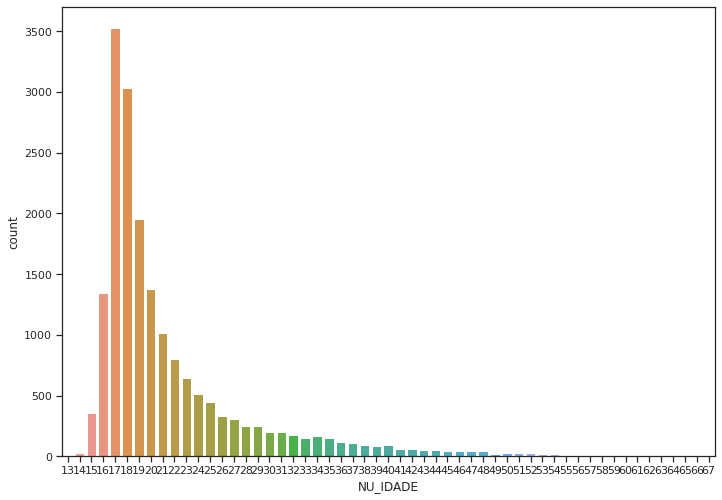

In [27]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x='NU_IDADE', data=data);

Podemos fazer um agrupamento das idades por categoria, dado que há uma variação muito grande de idades e algumas faixas etárias estão mais presentes no dataset.

In [0]:
data['TP_IDADE_AGRUPADA'] = pd.cut(data['NU_IDADE'], bins=[0, 17, 19, 21, 26, 31, 41, 100], labels=range(7)).ravel()
# as colunas de idade e indicando se é idoso não fazem mais sentido
data.drop(columns=['NU_IDADE', 'IN_IDOSO'], inplace=True)

Podemos criar uma feature que identifica se o candidato é estrangeiro ou não:

In [0]:
data['IN_ESTRANGEIRO'] = np.int64(~data['TP_NACIONALIDADE'].isin([0, 1, 2, 4]))
data.drop(columns=['TP_NACIONALIDADE'], inplace=True)

##codificação dos grupos de features categóricas:

Não entendi a fundo como funciona , [volte novamente nessa parte](https://github.com/pvoloshyn/AceleraDev-DS2020/blob/master/enem-2/enem%202016.ipynb).

Os dados do tipo *object* precisam ser codificados para que possamos alimentar o modelo de regressão.

In [0]:
def add_noise(series, noise_level):
    """
    Adiciona ruído randômico à série
    
    :param series: pd.Series de entrada
    :param noise_level: nível de ruído
    :returns: a mesma série com o ruído aplicado
    """
    return series * (1 + noise_level * np.random.randn(len(series)))

def smooth_encode(train_data, test_data, cols, target_column_name, encoded_column_name, 
                  min_samples_leaf=1, smoothing=1, noise_level=0):
    """
    Codifica variável categórica com Smooth Encoder. Num futuro podemos englobar isso em um modelo no padrão scikit-learn.
    
    :param train_data: pd.DataFrame com os dados de treino (para o fit interno)
    :param test_data: pd.DataFrame com os dados de teste (para o transform interno)
    :param cols: colunas que serão codificadas de forma agrupada
    :param target_column_name: nome da coluna alvo
    :param encoded_column_name: nome da coluna que terá os dados codificados
    :param min_samples_leaf: granularidade do codificador
    :param smoothing: suavidade do codificador
    :param noise_level: nível de ruído (ajuda a evitar overfitting)
    :returns: tupla com os 2 dataframes (treino e teste) com a coluna adicionada
    """
    # calcula médias agrupadas
    averages = train_data.groupby(by=cols)[target_column_name].agg(['mean', 'count'])
    # calcula suavidade com os parâmetros indicados
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    # caso não seja possível cruzar o agrupamento nas bases, usa a média do target como valor
    prior = train_data[target_column_name].mean()
    
    # nosso novo valor será uma interpolação entre a média do target com o que calculamos
    averages[target_column_name] = prior * (1 - smoothing) + averages['mean'] * smoothing
    
    averages.drop(['mean', 'count'], axis=1, inplace=True)
    
    averages.columns = [encoded_column_name]
    averages.reset_index(inplace=True)

    # adiciona coluna à base de treino
    tr_result = pd.merge(train_data, averages, on=cols, how='left')
    tr_result[encoded_column_name].fillna(prior, inplace=True)
    tr_result[encoded_column_name] = add_noise(tr_result[encoded_column_name], noise_level)
    # adiciona coluna à base de teste
    ts_result = pd.merge(test_data, averages, on=cols, how='left')
    ts_result[encoded_column_name].fillna(prior, inplace=True)
    ts_result[encoded_column_name] = add_noise(ts_result[encoded_column_name], noise_level)
    
    return tr_result, ts_result

In [31]:
  groups = [
    (['CO_UF_RESIDENCIA'], 'ENC_UF_RESIDENCIA'),
    (['CO_UF_RESIDENCIA', 'TP_COR_RACA'], 'ENC_UF_RESIDENCIA_COR_RACA'),
    (['CO_UF_RESIDENCIA', 'TP_IDADE_AGRUPADA'], 'ENC_UF_RESIDENCIA_IDADE_AGRUPADA'),
    (['CO_UF_RESIDENCIA', 'TP_SEXO'], 'ENC_UF_RESIDENCIA_SEXO'),
    (['CO_UF_RESIDENCIA', 'Q006'], 'ENC_UF_RESIDENCIA_Q006'),
    (['TP_COR_RACA'], 'ENC_COR_RACA'),
    (['TP_COR_RACA', 'TP_IDADE_AGRUPADA'], 'ENC_COR_RACA_IDADE_AGRUPADA'),
    (['TP_COR_RACA', 'TP_SEXO'], 'ENC_COR_RACA_SEXO'),
    (['TP_COR_RACA', 'Q006'], 'ENC_TP_COR_RACA_Q006'),
    (['TP_IDADE_AGRUPADA'], 'ENC_IDADE_AGRUPADA'),
    (['TP_IDADE_AGRUPADA', 'TP_SEXO'], 'ENC_IDADE_AGRUPADA_SEXO'),
    (['CO_UF_RESIDENCIA', 'TP_COR_RACA', 'TP_IDADE_AGRUPADA'], 'ENC_UF_RESIDENCIA_COR_RACA_IDADE_AGRUPADA'),
    (['CO_UF_RESIDENCIA', 'TP_COR_RACA', 'TP_IDADE_AGRUPADA', 'TP_SEXO'], 'ENC_UF_RESIDENCIA_COR_RACA_IDADE_AGRUPADA_SEXO'),
    (['IN_TREINEIRO'], 'ENC_TREINEIRO'),
    (['IN_TREINEIRO', 'TP_SEXO'], 'ENC_TREINEIRO_SEXO'),
]

np.random.seed(0)

min_samples_leaf = 10
smoothing = 2
noise_level = 0.01

train, test = data.xs('train'), data.xs('test')

for g in groups:
    ts = time.time()
    
    cols, column_name = g
    
    train, test = smooth_encode(train_data=train, 
                                test_data=test, 
                                cols=cols,
                                target_column_name=target_col, 
                                encoded_column_name=column_name,
                                min_samples_leaf=min_samples_leaf,
                                smoothing=smoothing,
                                noise_level=noise_level)
    
    print('{} criada! ({:.4f}s)'.format(column_name, time.time() - ts))
    
data = pd.concat([train, test], keys=['train', 'test'])

ENC_UF_RESIDENCIA criada! (0.0689s)
ENC_UF_RESIDENCIA_COR_RACA criada! (0.0346s)
ENC_UF_RESIDENCIA_IDADE_AGRUPADA criada! (0.0401s)
ENC_UF_RESIDENCIA_SEXO criada! (0.0362s)
ENC_UF_RESIDENCIA_Q006 criada! (0.0365s)
ENC_COR_RACA criada! (0.0320s)
ENC_COR_RACA_IDADE_AGRUPADA criada! (0.0436s)
ENC_COR_RACA_SEXO criada! (0.0372s)
ENC_TP_COR_RACA_Q006 criada! (0.0392s)
ENC_IDADE_AGRUPADA criada! (0.0355s)
ENC_IDADE_AGRUPADA_SEXO criada! (0.0476s)
ENC_UF_RESIDENCIA_COR_RACA_IDADE_AGRUPADA criada! (0.0694s)
ENC_UF_RESIDENCIA_COR_RACA_IDADE_AGRUPADA_SEXO criada! (0.0811s)
ENC_TREINEIRO criada! (0.0362s)
ENC_TREINEIRO_SEXO criada! (0.0396s)


## Limpeza de dados. 
Vamos agora confrontar os valores que estão em treino com os que estão em teste para sabermos se podemos retirar registros desnecessários.


Iremos filtrar apenas os candidatos que estiveram presentes de fato na prova de matemática (mesmo dia de linguagens e códigos).

In [0]:
categorical_features = [
    'CO_PROVA_CH',
    'CO_PROVA_CN',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'CO_UF_RESIDENCIA',
    'IN_GESTANTE',
    'IN_PCD',
    'IN_SABATISTA',
    'IN_TREINEIRO',
    'Q001',
    'Q002',
    'Q006',
    'Q024',
    'Q025',
    'Q026',
    'Q047',
    'TP_ANO_CONCLUIU',
    'TP_COR_RACA',
    'TP_ESCOLA',
    'TP_LINGUA',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_LC',
    'TP_SEXO',
    'TP_STATUS_REDACAO',
    'TP_ST_CONCLUSAO',
    'TP_IDADE_AGRUPADA', 
    'IN_ESTRANGEIRO'
]

In [33]:
train, test = data.xs('train'), data.xs('test')

for col in categorical_features:
    print(col)
    train_set = set(train[col].unique())
    test_set = set(test[col].unique())
    
    labels_not_found = list(train_set - test_set)
    ratio = float(len(train[train[col].isin(labels_not_found)])) / float(len(train[col]))
    print(f'  Não existem na base de teste: {labels_not_found} ({ratio})')
    
    labels_not_found = list(test_set - train_set)
    ratio = float(len(test[test[col].isin(labels_not_found)])) / float(len(test[col]))
    print(f'  Não existem na base de treino: {labels_not_found} ({ratio})')
    
    print('')

CO_PROVA_CH
  Não existem na base de teste: [7.0] (7.283321194464675e-05)
  Não existem na base de treino: [] (0.0)

CO_PROVA_CN
  Não existem na base de teste: [6.0] (7.283321194464675e-05)
  Não existem na base de treino: [] (0.0)

CO_PROVA_LC
  Não existem na base de teste: [] (0.0)
  Não existem na base de treino: [] (0.0)

CO_PROVA_MT
  Não existem na base de teste: [] (0.0)
  Não existem na base de treino: [] (0.0)

CO_UF_RESIDENCIA
  Não existem na base de teste: [] (0.0)
  Não existem na base de treino: [] (0.0)

IN_GESTANTE
  Não existem na base de teste: [] (0.0)
  Não existem na base de treino: [] (0.0)

IN_PCD
  Não existem na base de teste: [] (0.0)
  Não existem na base de treino: [] (0.0)

IN_SABATISTA
  Não existem na base de teste: [] (0.0)
  Não existem na base de treino: [] (0.0)

IN_TREINEIRO
  Não existem na base de teste: [] (0.0)
  Não existem na base de treino: [] (0.0)

Q001
  Não existem na base de teste: [] (0.0)
  Não existem na base de treino: [] (0.0)

Q00

In [0]:
data = data[~data['CO_PROVA_CH'].isin([7])]
data = data[~data['CO_PROVA_CN'].isin([6])]
data = data[~data['TP_ESCOLA'].isin([4])]
data = data[~data['TP_PRESENCA_CH'].isin([2])]
data = data[~data['TP_PRESENCA_CN'].isin([2])]


In [35]:
data.dtypes

NU_INSCRICAO                                        object
CO_UF_RESIDENCIA                                     int64
TP_SEXO                                            float64
TP_COR_RACA                                          int64
TP_ST_CONCLUSAO                                      int64
TP_ANO_CONCLUIU                                      int64
TP_ESCOLA                                            int64
IN_TREINEIRO                                         int64
IN_SABATISTA                                         int64
IN_GESTANTE                                          int64
TP_PRESENCA_CN                                       int64
TP_PRESENCA_CH                                       int64
TP_PRESENCA_LC                                       int64
CO_PROVA_CN                                        float64
CO_PROVA_CH                                        float64
CO_PROVA_LC                                        float64
CO_PROVA_MT                                        float

In [36]:
data.head()

NU_INSCRICAO  ...  ENC_TREINEIRO_SEXO
train 0  ed50e8aaa58e7a806c337585efee9ca41f1eb1ad  ...          494.774325
      1  2c3acac4b33ec2b195d77e7c04a2d75727fad723  ...          462.156428
      2  f4545f8ccb9ff5c8aad7d32951b3f251a26e6568  ...          469.288855
      3  3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe  ...          457.007176
      4  bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268  ...          493.069913

[5 rows x 54 columns]

In [0]:
data['ELIMINADO'] = data['TP_PRESENCA_LC']!=1
data.drop(columns=['TP_PRESENCA_LC'], inplace=True)
categorical_features.remove('TP_PRESENCA_LC')

## Visualizações
Aqui é mostrado um pouco sobre a correlação entre as features e o nosso target

Como estamos interessados em quem fez a prova de matemática, vamos retirar quem simplesmente não fez a prova.

In [0]:
train_data, test_data = data.xs('train'), data.xs('test')
train_data = train_data[train_data['ELIMINADO']==0]
test_data = test_data[test_data['ELIMINADO']==0]

### Correlação das features com target

In [39]:
numeric_features = list(data.columns[~data.columns.isin(categorical_features + ['NU_INSCRICAO', 'ELIMINADO', target_col])])
numeric_features

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'ENC_UF_RESIDENCIA',
 'ENC_UF_RESIDENCIA_COR_RACA',
 'ENC_UF_RESIDENCIA_IDADE_AGRUPADA',
 'ENC_UF_RESIDENCIA_SEXO',
 'ENC_UF_RESIDENCIA_Q006',
 'ENC_COR_RACA',
 'ENC_COR_RACA_IDADE_AGRUPADA',
 'ENC_COR_RACA_SEXO',
 'ENC_TP_COR_RACA_Q006',
 'ENC_IDADE_AGRUPADA',
 'ENC_IDADE_AGRUPADA_SEXO',
 'ENC_UF_RESIDENCIA_COR_RACA_IDADE_AGRUPADA',
 'ENC_UF_RESIDENCIA_COR_RACA_IDADE_AGRUPADA_SEXO',
 'ENC_TREINEIRO',
 'ENC_TREINEIRO_SEXO']

In [40]:
data[numeric_features].dtypes

NU_NOTA_CN                                        float64
NU_NOTA_CH                                        float64
NU_NOTA_LC                                        float64
NU_NOTA_COMP1                                     float64
NU_NOTA_COMP2                                     float64
NU_NOTA_COMP3                                     float64
NU_NOTA_COMP4                                     float64
NU_NOTA_COMP5                                     float64
NU_NOTA_REDACAO                                   float64
ENC_UF_RESIDENCIA                                 float64
ENC_UF_RESIDENCIA_COR_RACA                        float64
ENC_UF_RESIDENCIA_IDADE_AGRUPADA                  float64
ENC_UF_RESIDENCIA_SEXO                            float64
ENC_UF_RESIDENCIA_Q006                            float64
ENC_COR_RACA                                      float64
ENC_COR_RACA_IDADE_AGRUPADA                       float64
ENC_COR_RACA_SEXO                                 float64
ENC_TP_COR_RAC

In [0]:
def corr_to_target(dataframe, target, title=None):
    """
    Apresenta heatmap apenas do nosso target com as demais features
    
    :param dataframe: dataframe contendo features e target
    :param target: nome da coluna do target
    :param title: título do nosso gráfico
    """
    plt.figure(figsize=(4, 10))
    sns.heatmap(dataframe.corr()[[target]].sort_values(target, ascending=False)[1:], 
                annot=True, 
                fmt='.2f',
                cmap='coolwarm')
    
    if title:
        plt.title(f'\n{title}\n', fontsize=18)
    
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

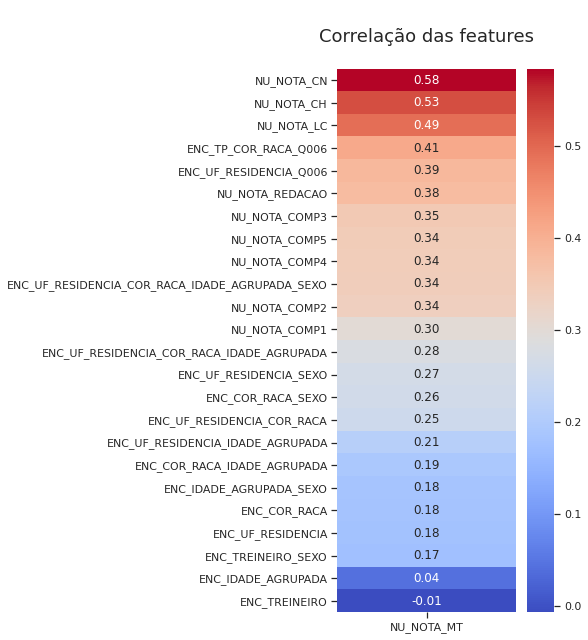

In [42]:
corr_to_target(train_data[numeric_features + [target_col]], target_col, title='Correlação das features')

In [0]:
def gen_distplots(train, test, features, cols=1, title=''):
    """
    Apresenta gráficos de distribuição de valores de treino e teste sobrepostos para cada feature indicada
    
    :param train: dataframe de treino
    :param test: dataframe de teste
    :param features: features que queremos apresentar
    :param cols: número máximo de colunas da grade
    :param title: título da figura
    """
    rows = math.ceil(len(features) / cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(figwidth, figheight))
    
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    ax = ax.ravel()
    
    for i, feature in enumerate(features):
        sns.distplot(train[feature].dropna(), ax=ax[i])
        sns.distplot(test[feature].dropna(), ax=ax[i])
        ax[i].legend(labels=['train', 'test'], loc='upper right')
        
    fig.suptitle(title, size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.8)
    plt.show()

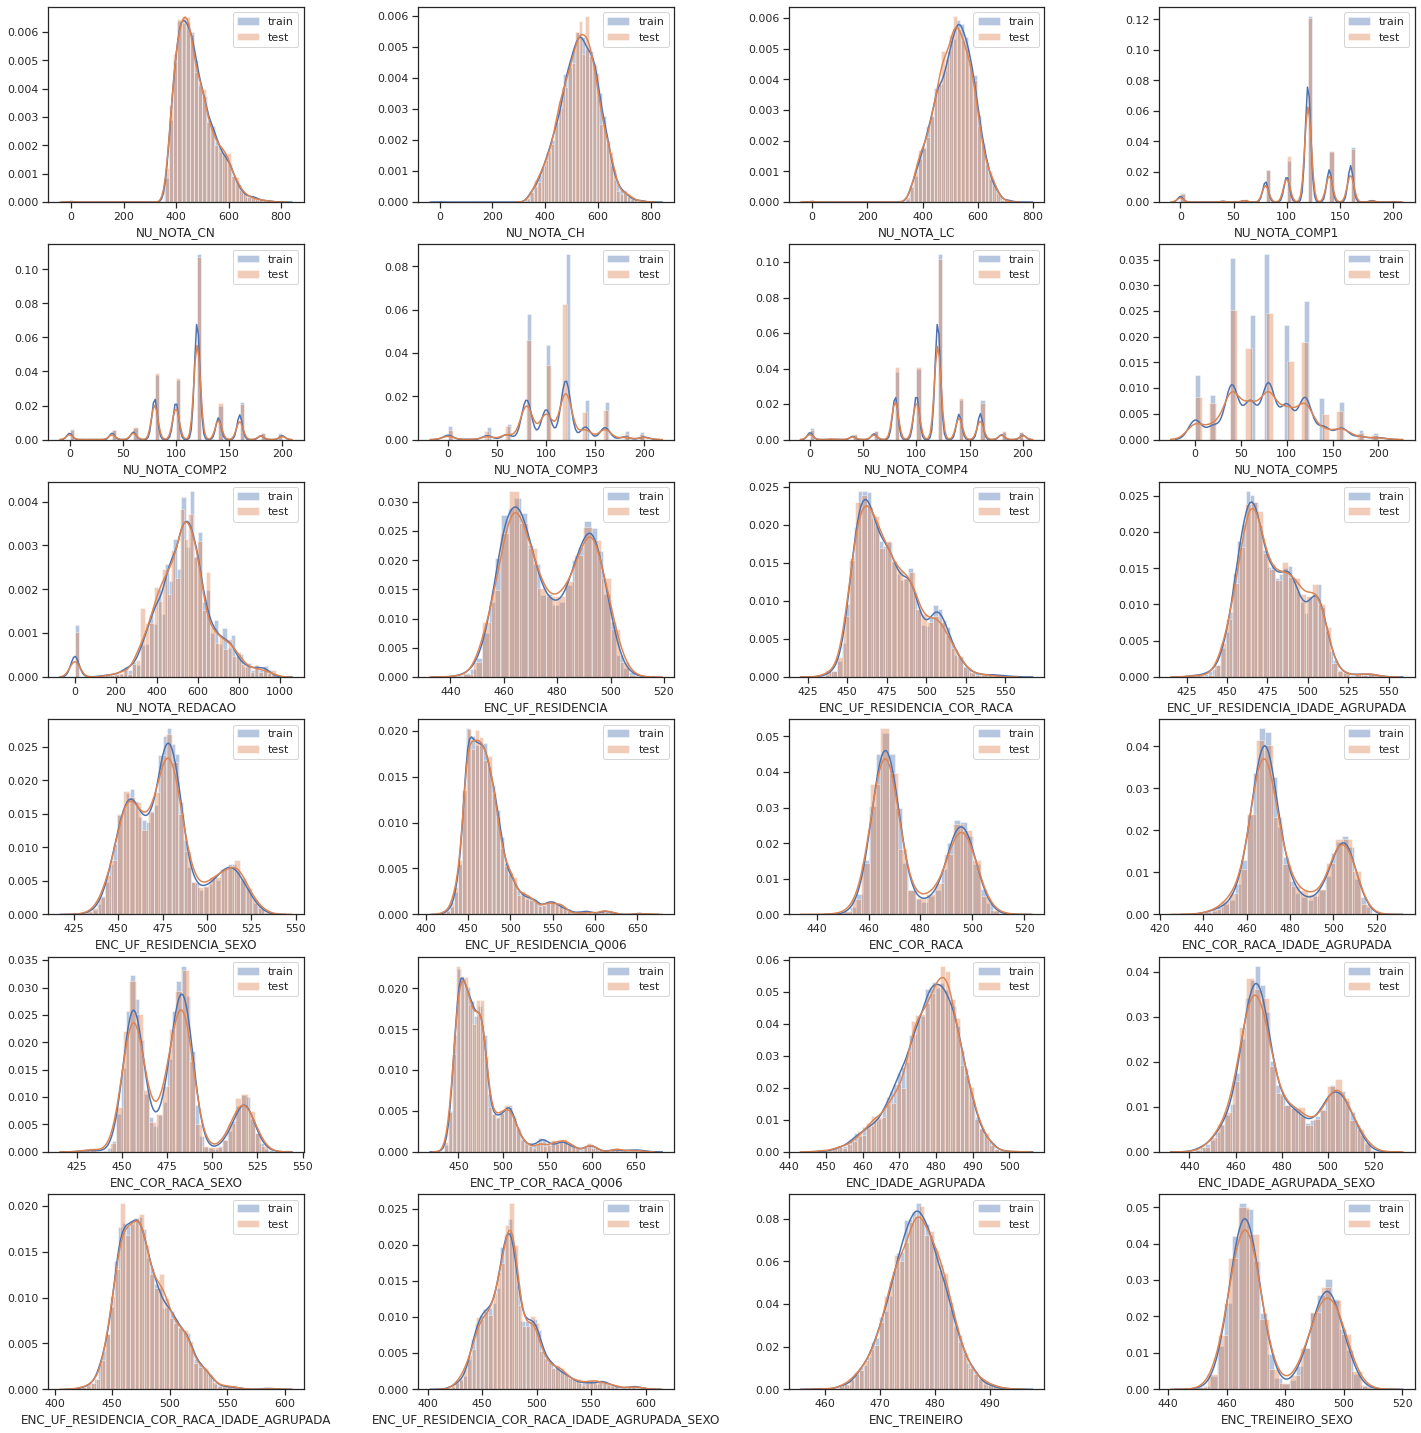

In [44]:
gen_distplots(train_data, test_data, features=numeric_features, cols=4)

## Preparando X e y de treino e teste

In [0]:
train_data, test_data = data.xs('train'), data.xs('test')

In [0]:
mask_train = (train_data['ELIMINADO']==0)
mask_test = (test_data['ELIMINADO']==0)

In [0]:
X = train_data[mask_train].drop(columns=['NU_INSCRICAO', 'ELIMINADO', target_col])
y = train_data.loc[mask_train, target_col]

X_test = test_data[mask_test].drop(columns=['NU_INSCRICAO', 'ELIMINADO', target_col])

## Procurando por outliers:

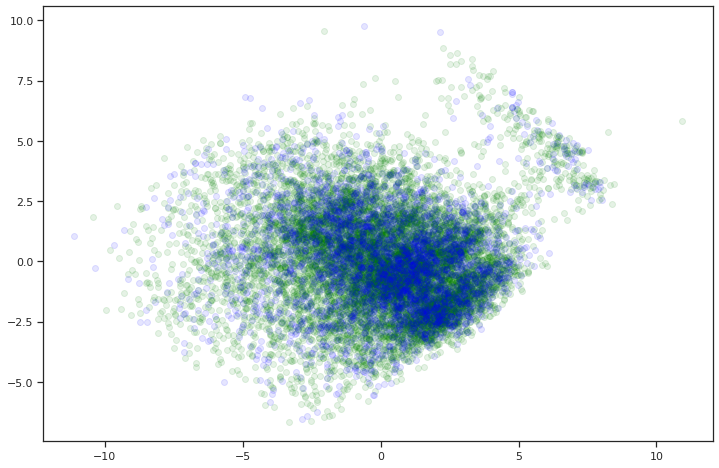

In [48]:
scaler = StandardScaler().fit(X[numeric_features])
X_train_scaled = scaler.transform(X[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

pca = PCA(n_components=2).fit(X_train_scaled)

train_points = pca.transform(X_train_scaled)
plt.scatter(train_points[:, 0], train_points[:, 1], c='green', alpha=0.1)

test_points = pca.transform(X_test_scaled)
plt.scatter(test_points[:, 0], test_points[:, 1], c='blue', alpha=0.1);

In [0]:
outlier_detector = LocalOutlierFactor(n_neighbors=20, contamination=0.003, novelty=True).fit(X_train_scaled)
mask = outlier_detector.predict(X_train_scaled)==-1

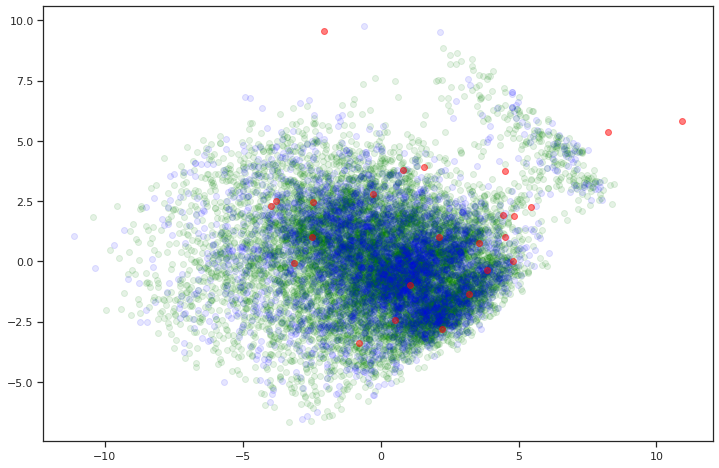

In [50]:
pca = PCA(n_components=2).fit(X_train_scaled)

train_points = pca.transform(X_train_scaled[~mask])
plt.scatter(train_points[:, 0], train_points[:, 1], c='green', alpha=0.1)

test_points = pca.transform(X_test_scaled)
plt.scatter(test_points[:, 0], test_points[:, 1], c='blue', alpha=0.1)

outliers = pca.transform(X_train_scaled[mask])
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', alpha=0.5);

In [0]:
mask = outlier_detector.predict(X_train_scaled)!=-1
X, y = X[mask], y[mask]

##Criando o nosso modelo:

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:

categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])



preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ,
    ], 
    remainder='drop'
)

preprocessor.fit(X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cat',
                                 Pipeline(memory=None,
                                          steps=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False))],
                                          verbose=False),
                                 ['CO_PROVA_CH', 'CO_PROVA_CN', 'CO_PROVA_LC',
                                  'CO_PROVA_MT', 'CO_UF_RESIDENCIA'...
                                  'ENC_UF_RESIDENCIA_IDADE_AGRUPADA',
                                

In [0]:
X_train_transf = preprocessor.transform(X_train)
X_valid_transf = preprocessor.transform(X_valid)
X_test_transf = preprocessor.transform(X_test)

In [0]:
linear_model = LinearRegression().fit(X_train_transf, y_train)

In [0]:
def root_mean_squared_error(y_true, y_pred):
    """
    Calcula RMSE.
    (Erro médio quadrado)
    :param y_true: targets reais
    :param y_pred: targets preditos
    :returns: RMSE
    """
    return mean_squared_error(y_true, y_pred, squared=False)

In [57]:
preds = linear_model.predict(X_valid_transf)
print('RMSE:', root_mean_squared_error(y_valid, preds))
print('MAE:', mean_absolute_error(y_valid, preds))
print('R2:', r2_score(y_valid, preds))

RMSE: 77.11079248329418
MAE: 60.813848342404754
R2: 0.43098097431746696


In [58]:
final_df = pd.DataFrame(columns=['NU_INSCRICAO','NU_NOTA_MT'])
final_df['NU_INSCRICAO'] = df_test['NU_INSCRICAO'].copy()
final_df['NU_NOTA_MT'] = pd.Series(preds)
print(final_df.head(10))
final_df.to_csv('/content/drive/My Drive/Engenharia Elétrica/GPDS/Data Science/desafio aceleradev/submiss_02.csv',index=False)

                               NU_INSCRICAO  NU_NOTA_MT
0  73ff9fcc02f0a99919906c942c2e1a1042cdcf98    663.7500
1  71a95f9f1b91a82c65ad94abbdf9f54e6066f968    484.7500
2  b38a03232f43b11c9d0788abaf060f7366053b6d    469.1875
3  70b682d9a3636be23f6120fa9d6b164eb3c6002d    434.3125
4  715494628a50142ce8cb17191cfe6d0f3cae0934    465.1875
5  e656d6bad65c93fb2880f1eba5037008c8e75774    493.0000
6  465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13    481.3125
7  11539e86171bf07d3a36f09377d7f54ebcc8406a    572.3750
8  043c544a2104aa8a9849f1a703a08d37a2f16839    515.7500
9  76ba050e64ad100b856f0eaabd8f539d5c7dd185    381.3750


Resultado:
SEU SCORE: 57.96%

## Segundo tipo de regressão (LightGBM): 


In [0]:
def kfold_lightgbm(X_train, y_train, X_test, categorical_features, lgb_params, num_folds, random_state):
    """
    Monta modelo LightGBM com KFold. Num futuro podemos englobar isso em um modelo no padrão scikit-learn.
    
    :param X_train: dados de treino
    :param y_train: target de treino
    :param X_test: dados de teste
    :param categorical_features: lista com as features categóricas
    :param lgb_params: parâmetros para o modelo
    :param num_folds: número de partições
    :param random_state: semente randômica
    :returns: target previsto para a base de teste
    """
    folds = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)
    # criando arrays para armazenarmos os resultados
    oof_preds = np.zeros(X_train.shape[0])
    sub_preds = np.zeros(X_test.shape[0])
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
        train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
        valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

        # configurando nossos parâmetros
        reg = lgb.LGBMRegressor(n_estimators=1000, random_state=random_state)
        reg.set_params(**lgb_params)
        
        reg.fit(
            train_x, 
            train_y, 
            categorical_feature=categorical_features,
            eval_metric='mae', 
            eval_set=[(valid_x, valid_y)],
            verbose=False, 
            early_stopping_rounds=30)

        oof_preds[valid_idx] = reg.predict(valid_x, num_iteration=reg.best_iteration_)
        sub_preds += reg.predict(X_test, num_iteration=reg.best_iteration_) / folds.n_splits
        
        del reg, train_x, train_y, valid_x, valid_y
        gc.collect()
    
    return sub_preds

In [0]:
LGB_FIXED_PARAMS = {
    'random_state': 0,
    'objective': 'regression',
    'metric': 'mae',
    'verbosity': -1,
    'boosting_type': 'gbdt',
}

def lgb_objective(trial):
    params = {
        **LGB_FIXED_PARAMS,
        'max_depth': trial.suggest_categorical('max_depth', [-1] + list(range(4, 15))),
        'num_leaves': trial.suggest_categorical('num_leaves', [2**i for i in range(4, 15)]),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.),
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.),
        'min_child_weight': trial.suggest_int('min_child_weight', 50, 500),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 5.),
    }
    
    preds = kfold_lightgbm(X_train, y_train, X_valid, categorical_features, lgb_params=params, num_folds=5, random_state=0)
    score = mean_absolute_error(y_valid, preds)
    return score

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=0))

In [61]:
study.optimize(lgb_objective, n_trials=200)

[I 2020-06-04 17:06:30,182] Finished trial#0 with value: 58.64574481139565 with parameters: {'max_depth': 8, 'num_leaves': 16, 'colsample_bytree': 0.8808290128214932, 'subsample': 0.863464954899069, 'min_child_weight': 59, 'lambda_l2': 0.0026568185455579404}. Best is trial#0 with value: 58.64574481139565.
[I 2020-06-04 17:06:32,471] Finished trial#1 with value: 59.80722692338652 with parameters: {'max_depth': 5, 'num_leaves': 256, 'colsample_bytree': 0.7892603819633417, 'subsample': 0.7170138931952329, 'min_child_weight': 446, 'lambda_l2': 2.165440577786049e-05}. Best is trial#0 with value: 58.64574481139565.
[I 2020-06-04 17:06:35,611] Finished trial#2 with value: 59.11020816114538 with parameters: {'max_depth': 9, 'num_leaves': 2048, 'colsample_bytree': 0.8586684759258714, 'subsample': 0.8704133683281796, 'min_child_weight': 215, 'lambda_l2': 0.18750984951329078}. Best is trial#0 with value: 58.64574481139565.
[I 2020-06-04 17:06:40,583] Finished trial#3 with value: 59.17141482033262

In [62]:
study.best_params

{'colsample_bytree': 0.8994064297904105,
 'lambda_l2': 0.004472668832248635,
 'max_depth': 14,
 'min_child_weight': 52,
 'num_leaves': 16,
 'subsample': 0.8720823398847817}

In [63]:
optuna.visualization.plot_optimization_history(study)

In [0]:
lgb_best_params = {**study.best_params, **LGB_FIXED_PARAMS}
preds = kfold_lightgbm(X_train, y_train, X_valid, categorical_features, lgb_best_params, num_folds=5, random_state=0)

In [65]:
print('RMSE:', root_mean_squared_error(y_valid, preds))
print('MAE:', mean_absolute_error(y_valid, preds))
print('R2:', r2_score(y_valid, preds))

RMSE: 74.41131861149107
MAE: 58.53839355971367
R2: 0.47012374788774713


In [66]:
preds = kfold_lightgbm(X_train, y_train, X_test, categorical_features, lgb_best_params, num_folds=5, random_state=0)
output_data = df_test.iloc[:, [0]]
output_data.loc[mask_test, target_col] = np.clip(preds, 0., 1000.)
output_data.loc[~mask_test, target_col] = 0
print(output_data)

                                  NU_INSCRICAO  NU_NOTA_MT
0     73ff9fcc02f0a99919906c942c2e1a1042cdcf98  438.369982
1     71a95f9f1b91a82c65ad94abbdf9f54e6066f968  446.525155
2     b38a03232f43b11c9d0788abaf060f7366053b6d  556.783147
3     70b682d9a3636be23f6120fa9d6b164eb3c6002d    0.000000
4     715494628a50142ce8cb17191cfe6d0f3cae0934  573.315823
...                                        ...         ...
4571  dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b  455.772889
4572  a75fa8770257e7c9368d059fe53d9ef431f4bdef  478.198462
4573  655fa6306720ff16e825903b5422a46608a77545  685.533073
4574  1f4bc3e3d56212d500625bfe8ac78ccff4362293  467.503141
4575  adf0d15b54317b6564ef56dad2b775bbb0ef50cc    0.000000

[4576 rows x 2 columns]


In [0]:

output_data.to_csv('/content/drive/My Drive/Engenharia Elétrica/GPDS/Data Science/desafio aceleradev/RED=2.csv', index=False)

Resultado : Score: 93.78%